In [1]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/13.3 MB 2.8 MB/s eta 0:00:05
   ------- -------------------------------- 2.4/13.3 MB 2.9 MB/s eta 0:00:04
   -------- ------------------------------- 2.9/13.3 MB 2.9 MB/s eta 0:00:04
   ----------- ---------------------------- 3.7/13.3 MB 2.9 MB/s eta 0:00:04
   ------------- -------------------------- 4.5/13.3 MB 2.9 MB/s eta 0:00:04
   -------------- ------------------------- 5.0/13.3 MB 3.0 MB/s eta 0:00:03
   ----------------- ---------------------- 5.8/13.3 MB 2.9 MB/s eta 0:00:03
   ------------------ --------------------- 6.3/13.3 MB 2.9 MB/s eta 0:00:03
   --------------------- ------------------ 7.1/13.3 MB 2.9 MB/s eta 0:00:03
   ---------------------- ----------------- 7.6/13.3 MB 2.9 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\imdev\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
n = 365


In [6]:
dates = pd.date_range(start = '2023-01-01', periods = n, freq = 'D')

In [10]:
seasonal_effect = 10 * np.sin(np.linspace(0, 2 * np.pi, n))

In [11]:
noise = np.random.normal(0,5, size = n)

In [12]:
trend = np.linspace(50, 200, n)

In [13]:
holiday_effect = np.random.choice([0,1], size = n, p = [0.9,0.1])


In [14]:
sales = trend + seasonal_effect + noise + holiday_effect * 30

In [15]:
sales

array([ 43.53329591,  43.08889822,  54.98732116,  51.48521113,
        75.0560865 ,  58.23397399,  49.97557544,  54.99563693,
        85.41250595,  50.53898197,  43.44248826,  56.07012837,
        95.44587582,  45.2128473 ,  86.76484534,  60.64454454,
        86.81599686,  52.00974873,  57.47913692,  69.51680587,
        55.11719866,  83.2645333 ,  66.11105082,  88.27464193,
        56.27216644,  59.66431662,  68.37025976,  79.69645714,
        68.95125642,  63.80464325,  67.47719598,  70.34887843,
        67.84771897,  70.36648029,  73.71561901,  72.13946886,
        68.58827811,  71.49123854,  72.5720883 ,  76.06001065,
        70.18143889,  69.3600438 ,  75.05010434,  71.11650661,
       103.16277307,  71.60540036,  70.03073994,  77.71342155,
       106.88438252,  74.13966054,  78.38681926, 110.44361635,
        72.23607704,  75.399187  ,  85.49482854,  71.26373137,
        78.77933881,  89.72791147,  86.52097682,  83.40199256,
        88.99122303,  82.55589447,  87.32932446, 104.55

In [16]:
df = pd.DataFrame({
    'date' : dates,
    'sales': sales,
    'holiday_effect': holiday_effect
}
)

In [ ]:
df.head()

,date,sales,holiday_effect
0,2023-01-01,43.533296,0
1,2023-01-02,43.088898,0
2,2023-01-03,54.987321,0
3,2023-01-04,51.485211,0
4,2023-01-05,75.056086,1


In [18]:
df_prophet = df[["date","sales"]].rename(columns= {"date":"ds","sales":"y"})

In [19]:
df_prophet.head()

,ds,y
0,2023-01-01,43.533296
1,2023-01-02,43.088898
2,2023-01-03,54.987321
3,2023-01-04,51.485211
4,2023-01-05,75.056086


In [20]:
model = Prophet()


In [21]:
model.fit(df_prophet)

22:38:08 - cmdstanpy - INFO - Chain [1] start processing
22:38:09 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future_dates = pd.date_range(start = "2024-01-01", periods = 30, freq = "D")

In [24]:
future_df = pd.DataFrame({"ds":future_dates})

In [25]:
future_df.head()

,ds
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05


In [26]:
forecast = model.predict(future_df)


In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-01,199.812767,187.423360,213.302679,199.812767,199.812767,0.346337,0.346337,0.346337,0.346337,0.346337,0.346337,0.0,0.0,0.0,200.159105
1,2024-01-02,200.300795,189.498206,216.748245,200.300795,200.300795,2.724843,2.724843,2.724843,2.724843,2.724843,2.724843,0.0,0.0,0.0,203.025638
2,2024-01-03,200.788823,186.514370,211.014940,200.788715,200.794006,-1.674404,-1.674404,-1.674404,-1.674404,-1.674404,-1.674404,0.0,0.0,0.0,199.114420
3,2024-01-04,201.276851,186.163128,211.444265,201.271341,201.291850,-2.485874,-2.485874,-2.485874,-2.485874,-2.485874,-2.485874,0.0,0.0,0.0,198.790977
4,2024-01-05,201.764879,190.297977,218.689447,201.751313,201.790892,1.839893,1.839893,1.839893,1.839893,1.839893,1.839893,0.0,0.0,0.0,203.604772
5,2024-01-06,202.252908,189.788609,216.269489,202.225003,202.287177,0.375508,0.375508,0.375508,0.375508,0.375508,0.375508,0.0,0.0,0.0,202.628416
6,2024-01-07,202.740936,188.093677,214.444049,202.700608,202.784917,-1.126303,-1.126303,-1.126303,-1.126303,-1.126303,-1.126303,0.0,0.0,0.0,201.614632
7,2024-01-08,203.228964,190.254064,217.033956,203.172455,203.288496,0.346337,0.346337,0.346337,0.346337,0.346337,0.346337,0.0,0.0,0.0,203.575301
8,2024-01-09,203.716992,192.749013,221.042473,203.642696,203.789007,2.724843,2.724843,2.724843,2.724843,2.724843,2.724843,0.0,0.0,0.0,206.441834
9,2024-01-10,204.205020,189.799573,215.211467,204.110933,204.295238,-1.674404,-1.674404,-1.674404,-1.674404,-1.674404,-1.674404,0.0,0.0,0.0,202.530616


In [28]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2024-01-01,200.159105,187.423360,213.302679
1,2024-01-02,203.025638,189.498206,216.748245
2,2024-01-03,199.114420,186.514370,211.014940
3,2024-01-04,198.790977,186.163128,211.444265
4,2024-01-05,203.604772,190.297977,218.689447


<function matplotlib.pyplot.show(close=None, block=None)>

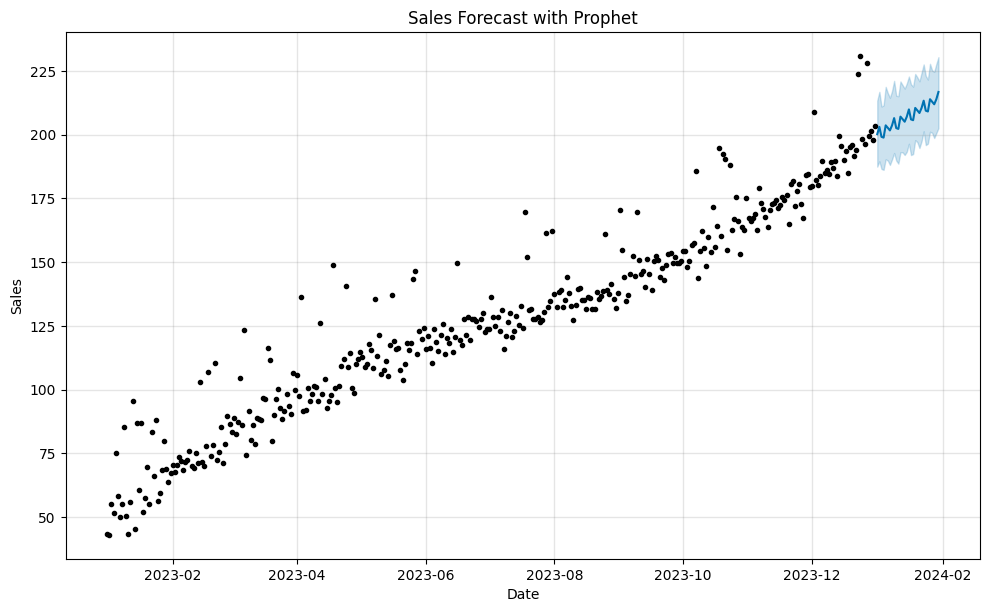

In [29]:
model.plot(forecast)
plt.title("Sales Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show

In [30]:
import pickle

In [31]:
with open("Prophet_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [32]:
with open("Prophet_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [33]:
loaded_model